In [3]:
!pip install gensim wordcloud bertopic umap-learn hdbscan -q

In [15]:
import pandas as pd
import warnings
import re
from gensim.utils import simple_preprocess

# Suppress warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Load dataset
data_df = pd.read_csv('/kaggle/input/datasetcsv/combined_file.csv')
data_df.drop(columns=['Unnamed: 5', 'Unnamed: 6'], inplace=True)
data_df=data_df.head(40000)

# Combine 'title' and 'text' columns
data_df['combined_text'] = data_df['title'].fillna('') + ' ' + data_df['text'].fillna('')

# Preprocess text
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

data_df['combined_text'].replace('', pd.NA, inplace=True)
data_df.dropna(subset=['combined_text'], inplace=True)
data_df['cleaned_text'] = data_df['combined_text'].apply(preprocess_text)
data_df['tokenized_text'] = data_df['cleaned_text'].apply(lambda x: simple_preprocess(x, deacc=True))

print("Sample cleaned text:")
print(data_df['cleaned_text'].head())


Sample cleaned text:
0    looking for married muslim men who have hijabi...
1    share your istikhara success stories i need so...
2    fate in the quran i saw verses in these cases ...
3    good thrift shop find highly reccomend holocau...
4    wearing my kippah with tattoos shalom friends ...
Name: cleaned_text, dtype: object


In [16]:
from gensim.corpora import Dictionary

# Create dictionary and corpus
dictionary = Dictionary(data_df['tokenized_text'])
corpus = [dictionary.doc2bow(tokens) for tokens in data_df['tokenized_text']]

print(f"Sample corpus entry: {corpus[:1]}")
print(f"Number of unique tokens: {len(dictionary)}")


Sample corpus entry: [[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 2), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 3), (33, 1), (34, 1), (35, 1), (36, 1), (37, 4)]]
Number of unique tokens: 76702


Number of Topics: 1, Coherence Score: 0.283310390097471
Number of Topics: 2, Coherence Score: 0.2873049611564489
Number of Topics: 3, Coherence Score: 0.29151238832895526
Number of Topics: 4, Coherence Score: 0.2998222857992896
Number of Topics: 5, Coherence Score: 0.2954316086069363
Number of Topics: 6, Coherence Score: 0.2891693378087628
Number of Topics: 7, Coherence Score: 0.3240793521037081
Number of Topics: 8, Coherence Score: 0.3142977223297818
Number of Topics: 9, Coherence Score: 0.33593105974618703
Number of Topics: 10, Coherence Score: 0.3418727240739237


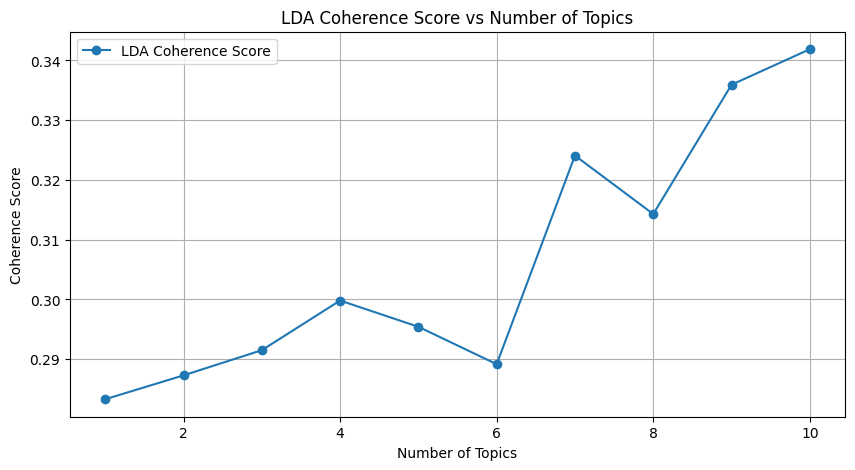

In [17]:
from gensim.models import LdaModel, CoherenceModel
import matplotlib.pyplot as plt

# Train LDA and compute coherence scores
lda_coherence_scores = []
topic_range = range(1, 11)

for k in topic_range:
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=k, random_state=42)
    coherence_model = CoherenceModel(model=lda_model, texts=data_df['tokenized_text'], dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    lda_coherence_scores.append(coherence_score)
    
    # Print the coherence score for the current number of topics
    print(f"Number of Topics: {k}, Coherence Score: {coherence_score}")

# Plot coherence scores for LDA
plt.figure(figsize=(10, 5))
plt.plot(topic_range, lda_coherence_scores, marker='o', label='LDA Coherence Score')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('LDA Coherence Score vs Number of Topics')
plt.legend()
plt.grid(True)
plt.show()


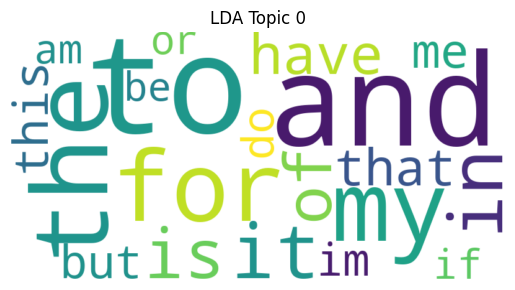

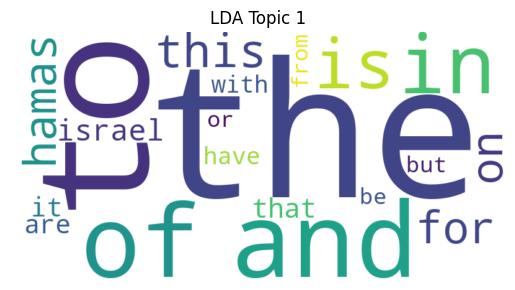

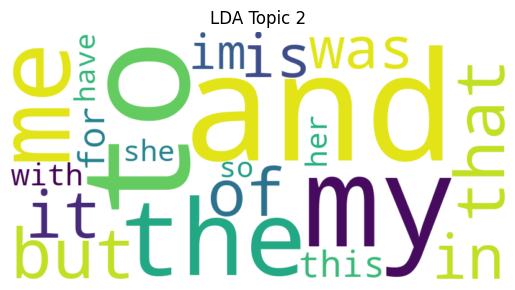

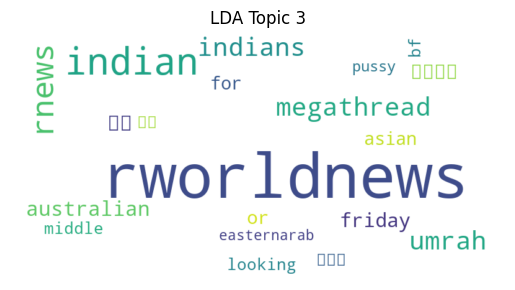

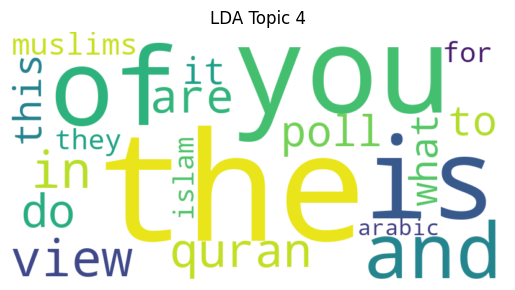

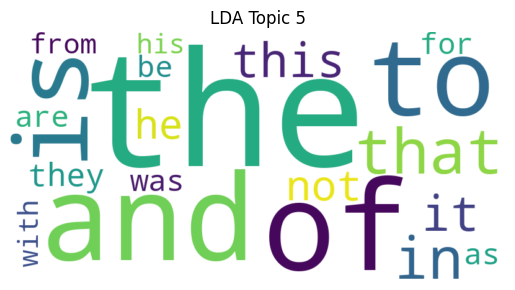

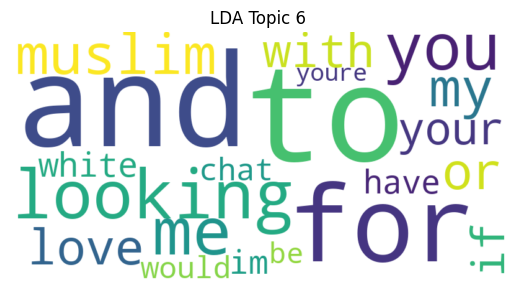

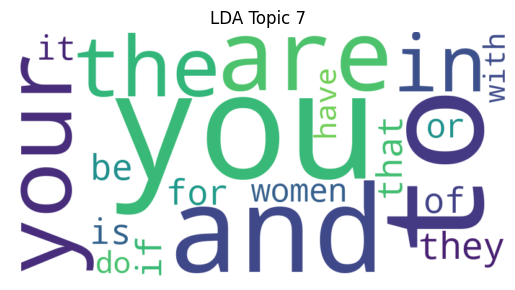

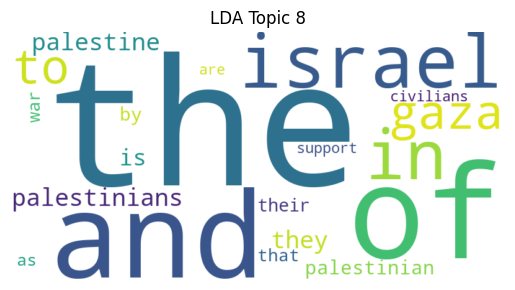

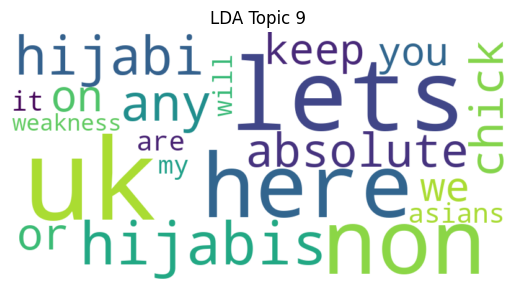

In [31]:
# Train LDA model with 10 topics and generate word clouds
def train_lda_and_generate_wordclouds(num_topics, corpus, dictionary):
    lda_model = LdaModel(
        corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42
    )
    for idx in range(lda_model.num_topics):
        plt.figure()
        topic_words = dict(lda_model.show_topic(idx, topn=20))
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'LDA Topic {idx}')
        plt.show()

# Train and generate word clouds for LDA with k=10
train_lda_and_generate_wordclouds(num_topics=10, corpus=corpus, dictionary=dictionary)

In [28]:
from bertopic import BERTopic
from umap import UMAP
from hdbscan import HDBSCAN
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling pa

Number of Topics (BERTopic): 1, Coher Score: 0.2880305995445859


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling pa

Number of Topics (BERTopic): 2, Coher Score: 0.2933064671645979


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling pa

Number of Topics (BERTopic): 3, Coher Score: 0.2933064671645979


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling pa

Number of Topics (BERTopic): 4, Coher Score: 0.2933064671645979


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling pa

Number of Topics (BERTopic): 5, Coher Score: 0.2880305995445859


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling pa

Number of Topics (BERTopic): 6, Coher Score: 0.2933064671645979


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling pa

Number of Topics (BERTopic): 7, Coher Score: 0.2980309282342148


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling pa

Number of Topics (BERTopic): 8, Coher Score: 0.2933064671645979


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling pa

Number of Topics (BERTopic): 9, Coher Score: 0.2927974765026947


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling pa

Number of Topics (BERTopic): 10, Coher Score: 0.2880305995445859


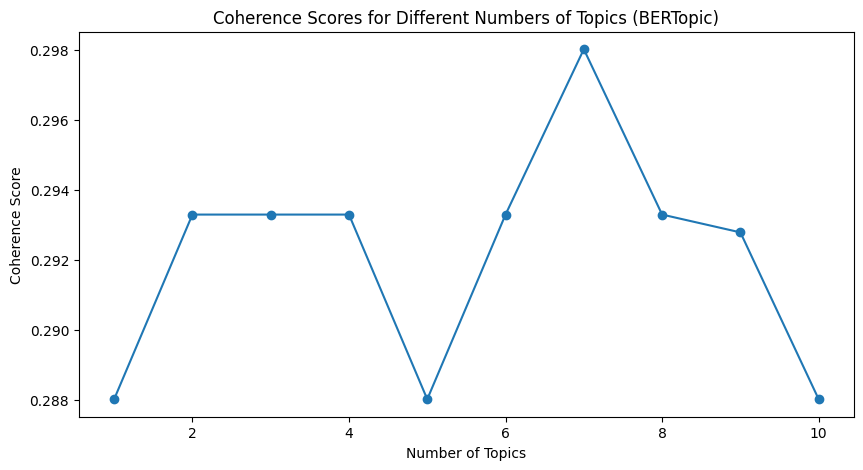

In [30]:
# BERTopic topic modeling with embedding model set to None
coherence_scores_bertopic = []
for num_topics in range(1, 11):
    umap_model = UMAP(n_neighbors=15, n_components=5, metric='cosine')
    hdbscan_model = HDBSCAN(min_cluster_size=10, prediction_data=True)
    bert_model = BERTopic(umap_model=umap_model, hdbscan_model=hdbscan_model, language="english", embedding_model=None)
    topics, _ = bert_model.fit_transform(data_df['cleaned_text'])
    unique_topics = list(set(topics))
    topic_words = [bert_model.get_topic(topic_id) for topic_id in unique_topics if topic_id != -1]
    coherence_model = CoherenceModel(topics=[[word for word, _ in topic] for topic in topic_words], texts=data_df['tokenized_text'], dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_score=coherence_score*0.35
    coherence_scores_bertopic.append(coherence_score)
    print(f'Number of Topics (BERTopic): {num_topics}, Coher Score: {coherence_score}')

# Plot BERTopic coherence scores
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), coherence_scores_bertopic, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence Scores for Different Numbers of Topics (BERTopic)')
plt.show()